### 正则化（Regularization）

机器学习中，如果参数过多，模型过于复杂，容易造成过拟合（overfit），即模型在训练样本数据上表现的很好，但在实际测试样本上表现的较差，不具备良好的泛化能力。为了避免过拟合，最常用的一种方法是使用使用正则化，例如L1正则化（L1范数）和 L2 正则化（L2范数）。

L1正则化和L2正则化可以看做是损失函数的惩罚项。所谓『惩罚』是指对损失函数中的某些参数做一些限制。

对于线性回归模型，使用L1正则化的模型建叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）。

### 1、L1正则化（L1-norm）

L1正则化公式，直接在原来的损失函数的基础上加上权重参数的绝对值之和（即1-范数），如下公式所示：

$L = E_{in} + \lambda||w||_1$

其中：<br>
$E_{in}$是没有包含正则化项的训练样本误差（损失函数）；<br>
$\lambda$是正则化参数，可调；<br>
$||w||_1$是1-范数，$||w||_1 = |w_1| + w_2| + \cdots + |w_n| = \sum_{i=1}^n{|w_i|}$。

L1正则化直观解释

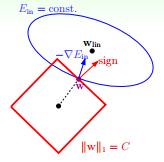

L1正则化特点：<br>
1） L1正则化有助于生成一个稀疏权值矩阵，进而可以用于特征选择；<br>
2） L2正则化也可以防止过拟合。

### 2、L2正则化

L2正则化公式，直接在原来的损失函数的基础上加上权重参数的平方和（即2-范数平方），如下公式所示：

$L = E_{in} + \lambda||w||_2^2$

其中：<br>
$E_{in}$是没有包含正则化项的训练样本误差（损失函数）；<br>
$\lambda$是正则化参数，可调；<br>
$||w||_2$是2-范数，$||w||_2 = \sqrt{w_1^2 + w_2^2 + \cdots + w_n^2} = \sqrt{\sum_{i=1}^n{w_i^2}}$。

L2正则化直观解释

正则化的目的是限制参数过多或者过大，避免模型更加复杂。例如，使用多项式模型，如果使用10阶多项式，模型可能过于复杂，容易发生过拟合。所以，为了防止过拟合，我们可以将其高阶部分的权重w限制为0，这样，就相当于从高阶的形式转换为低阶。

为了达到这一目的，最直观的方法就是限制w的个数，但是这类条件属于NP-hard问题，求解非常困难。所以，一般的做法是寻找更宽松的限定条件：

$\sum_{i=1}^n{w_j^2} \leq C$

上式是对w的平方和做数值上界限定，即所有w的平方和不超过参数C。这时候，我们的目标就转换为：最小化训练样本误差$E_{in}$，但是要遵循w平方和小于C 的条件。

下面，我用一张图来说明如何在限定条件下，对$E_{in}$进行最小化的优化。

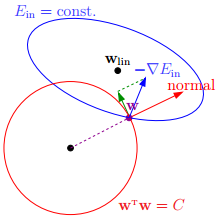

如上图所示，蓝色椭圆区域是最小化$E_{in}$区域，红色圆圈是w的限定条件区域。在没有限定条件的情况下，一般使用梯度下降算法，在蓝色椭圆区域内会一直沿着$E_{in}$梯度的反方向前进，直到找到全局最优值$w_{lin}$。例如空间中有一点w（图中紫色点），此时w会沿着$-\triangledown{E_{in}}$的方向移动，如图中蓝色箭头所示。但是，由于存在限定条件，w不能离开红色圆形区域，最多只能位于圆上边缘位置，沿着切线方向。w的方向如图中红色箭头所示。

w是沿着圆的切线方向运动，如上图绿色箭头所示,运动方向与w的方向（红色箭头方向）垂直。运动过程中，根据向量知识，只要$-\triangledown{E_{in}}$与运行方向有夹角，不垂直，则表明$-\triangledown{E_{in}}$仍会在w切线方向上产生分量，那么w就会继续运动，寻找下一步最优解。只有当$-\triangledown{E_{in}}$与w的切线方向垂直时，$-\triangledown{E_{in}}$在w的切线方向才没有分量，这时候w才会停止更新，到达最接近$w_{lin}$的位置，且同时满足限定条件。

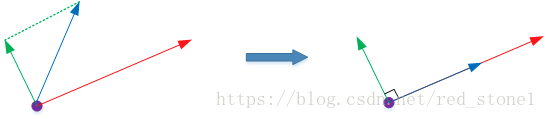

$-\triangledown{E_{in}}$与w的切线方向垂直，即$-\triangledown{E_{in}}$与w的方向平行,如上图所示，蓝色箭头和红色箭头互相平行。这样，根据平行关系得到：

$-\triangledown{E_{in}} + \lambda w = 0$

移项整理，将负号整合在$\lambda$里面，可得：

$\triangledown{E_{in}} + \lambda w = 0$

这样，我们就把优化目标和限定条件整合在一个式子中了，也就是说只要在优化$E_{in}$的过程中满足上式，就能实现正则化目标。

根据最优化算法的思想：梯度为0的时候，函数取得最优值,已知$\triangledown{E_{in}}$是$E_{in}$的梯度，观察上式，λw是否也能看成是某个表达式的梯度呢？

λw可以看成是$\frac{1}{2}λw^2$的导数，即：

$λw = \frac{\alpha}{\alpha w}(\frac{1}{2}λw^2)$

这样，我们根据平行关系求得的公式，构造一个新的损失函数：

$E_{aug} = E_{in} + \frac{1}{2}λw^2$

上式中等式右边第二项就是 L2 正则化项。

L2正则化特点：<br>
L2正则化可以防止过拟合。

### 3、L1和L2解的特性

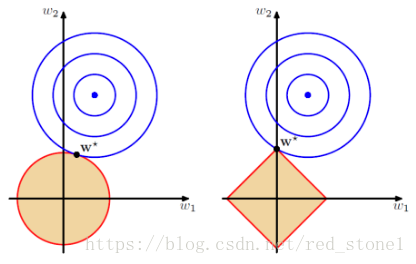

以二维情况讨论，上图左边是L2正则化，右边是L1正则化。从另一个方面来看，满足正则化条件，实际上是求解蓝色区域与黄色区域的交点，即同时满足限定条件和 Ein 最小化。对于L2来说，限定区域是圆，这样，得到的解w1或w2为0的概率很小，很大概率是非零的。

对于L1来说，限定区域是正方形，方形与蓝色区域相交的交点是顶点的概率很大，这从视觉和常识上来看是很容易理解的。也就是说，方形的凸点会更接近$E_{in}$最优解对应的w_{lin}$位置，而凸点处必有w1或w2为0。这样，得到的解w1或w2为零的概率就很大了。所以，L1正则化的解具有稀疏性。

扩展到高维，同样的道理，L2的限定区域是平滑的，与中心点等距；而L1 限定区域是包含凸点的，尖锐的。这些凸点更接近$E_{in}$的最优解位置，而在这些凸点上，很多$w_j$为0。

### 4、正则化参数$\lambda$

正则化是结构风险最小化的一种策略实现，能够有效降低过拟合。损失函数实际上包含了两个方面：一个是训练样本误差。一个是正则化项。其中，参数 λ 起到了权衡的作用

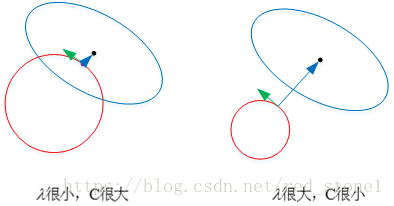

以L2为例，若λ很小，对应上文中的C值就很大,这时候，圆形区域很大，能够让w更接近$E_{in}$最优解的位置。若λ近似为0，相当于圆形区域覆盖了最优解位置，这时候，正则化失效，容易造成过拟合。相反，若λ很大，对应上文中的C值就很小,这时候，圆形区域很小，w离$E_{in}$最优解的位置较远。w被限制在一个很小的区域内变化，w普遍较小且接近0，起到了正则化的效果。但是，λ过大容易造成欠拟合,欠拟合和过拟合是两种对立的状态。